# Desafío - Gráficos y correlación

## 1. Importar librerías y .csv

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('nations.csv',encoding='iso-8859-1')

In [3]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


## 2. Refactor gráficos matplotlib a seaborn

a) HISTOGRAMAS

def binarize_histogram(dataframe, variable):
tmp = dataframe
tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
0)
hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
plt.subplot(1, 2, 1)
plt.hist(hist_0, alpha=.6, color='lightgrey')
plt.axvline(np.mean(hist_0))
plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
plt.subplot(1, 2, 2)
plt.hist(hist_1, alpha=.6, color='lightgrey')
plt.axvline(np.mean(hist_1))
plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
binarize_histogram(df, 'adfert')

In [6]:
def plot_mean(data,**kwargs):
    m = data.mean()
    plt.axvline(m, **kwargs)
    return m

def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    g=sns.FacetGrid(tmp,col_wrap=2,col='binarize',size=6)
    g.map(sns.histplot,variable,alpha=.5)
    g.map(plot_mean,variable,color='red')
  


/home/megaticac/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


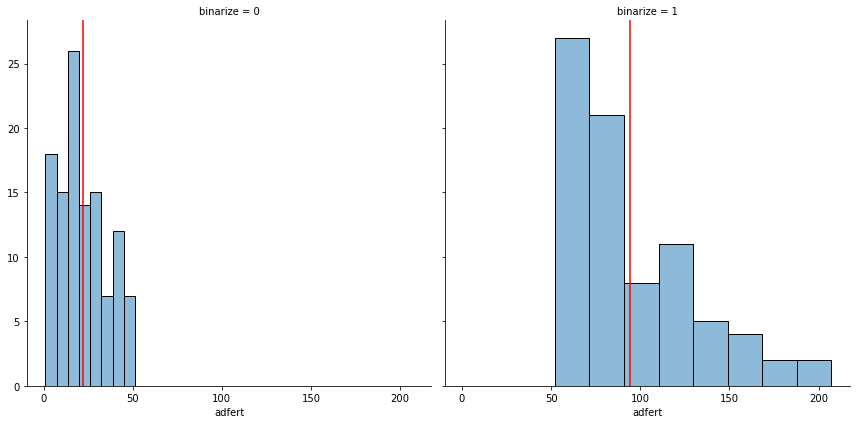

In [7]:
binarize_histogram(df,'adfert')

## Comentarios:
A partir de los gráficos se desprende lo siguiente:
    - La distribución de los datos menores a la media presentan una mayor condensación que los datos mayores a la media.
    - 

b) Boxplots

def grouped_boxplot(dataframe, variable, group_by):
tmp = dataframe
stratify_by = tmp[group_by].unique()
if len(stratify_by) / 2 > 3:
fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
else:
fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
for i, n in enumerate(stratify_by):
ax[i].boxplot(tmp[tmp[group_by] == n][variable])
ax[i].set_title(n)
grouped_boxplot(df, 'adfert', 'region')

In [37]:
def grouped_boxplot(dataframe,variable, group_by):
    tmp = dataframe
    g=sns.FacetGrid(tmp,col=group_by,size=3)
    g.map(sns.boxplot,variable,orient="v")
    

/home/megaticac/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/megaticac/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/megaticac/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/megaticac/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/megaticac/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_war

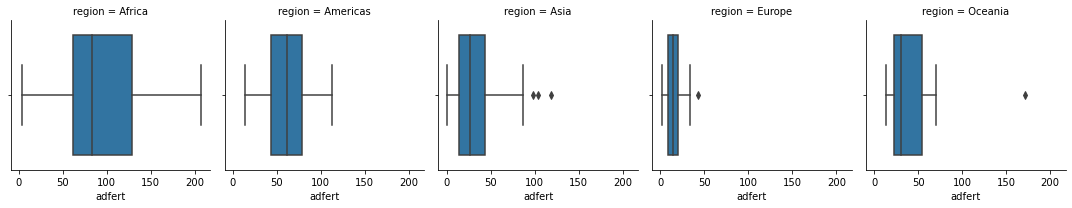

In [38]:
grouped_boxplot(df,'adfert','region')